# Power of Feature Engineering
Compare the performance of logistic regression to a DNN Classifier on a non-linear dataset. This is to show that similar accuracy, to the DNN, can be acheived by using logistic regression with transformations of the data. 

## Prepare Data

In [53]:
import numpy as np
import pandas as pd

n_points = 2000

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (100*age) +200*(performance) + 500*age/performance -10000 + 500*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

print(sum(y))
data.head()

459


,age,performance,y
0,51.03,-3.086543,0
1,50.55,2.056028,1
2,24.28,-7.718859,0
3,18.63,7.688844,0
4,58.38,-7.208604,0


In [63]:
#data.to_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
data = pd.read_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
sum(data['y'])

459

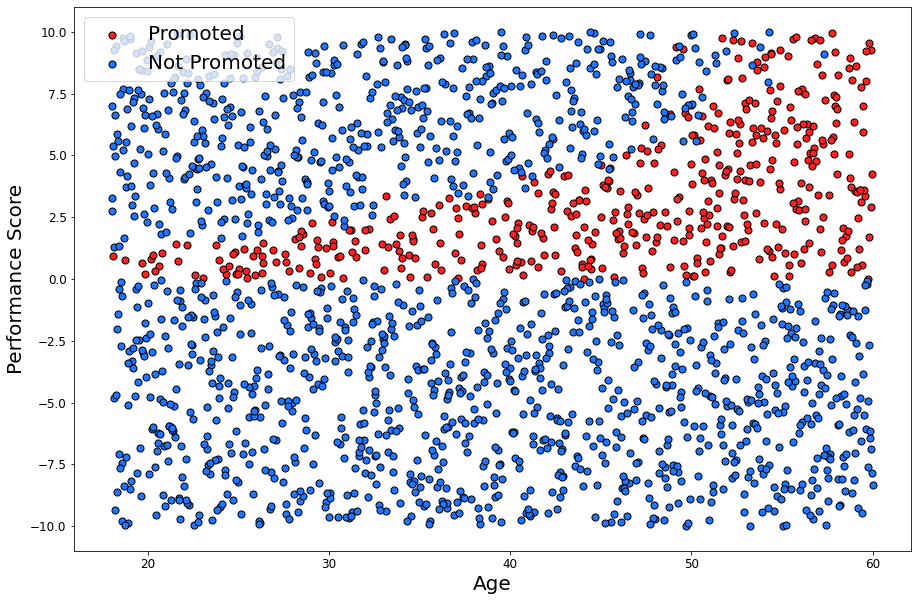

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

plt.savefig('../figures/article_feature_eng/figure1.png',format='png')

## Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

x = data[['age','performance']]
x = sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit() #fit logistic regression model

predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))

Optimization terminated successfully.
         Current function value: 0.433547
         Iterations 7
82.17


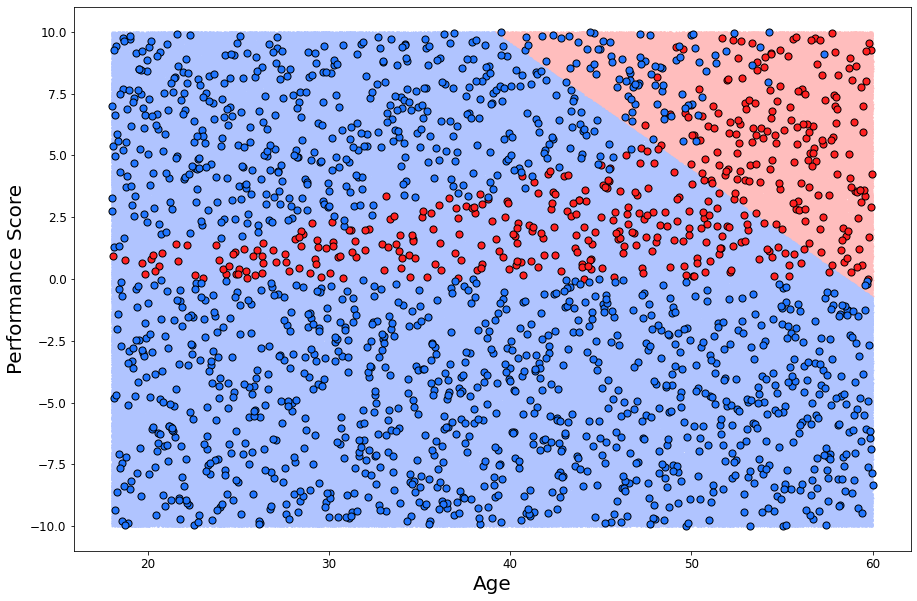

In [67]:
n_points = 1000000 #use many point to visualise decision boundry

age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)

performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age':age_db,'performance':performance_db})
data_db = sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('../figures/article_feature_eng/figure2.png',format='png')

### Add transformations and interactions

In [74]:
data['age_perf_ratio'] = age/performance

x = data[['age','performance','age_perf_ratio']]
x = sm.add_constant(x)
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

model = sm.Logit(y_train,x_train).fit() #fit new logistic regression model

predictions = np.around(model.predict(x_test))
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))

Optimization terminated successfully.
         Current function value: 0.041659
         Iterations 17
97.83


In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.9193
Time:                        21:31:27   Log-Likelihood:                -60.522
converged:                       True   LL-Null:                       -750.12
Covariance Type:            nonrobust   LLR p-value:                9.617e-299
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -40.5062      5.847     -6.928      0.000     -51.966     -29.046
age                0.3789      0.063      5.998      0.000       0.255       0.503
performance        0.9467      0.389      2.436      0.015       0.185       1.708
age_perf_ratio     2.0237      0.353      5.729      0.000       1.331       2.716
==================================================================================

Possibly complete quasi-separation: A fraction 0.78 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

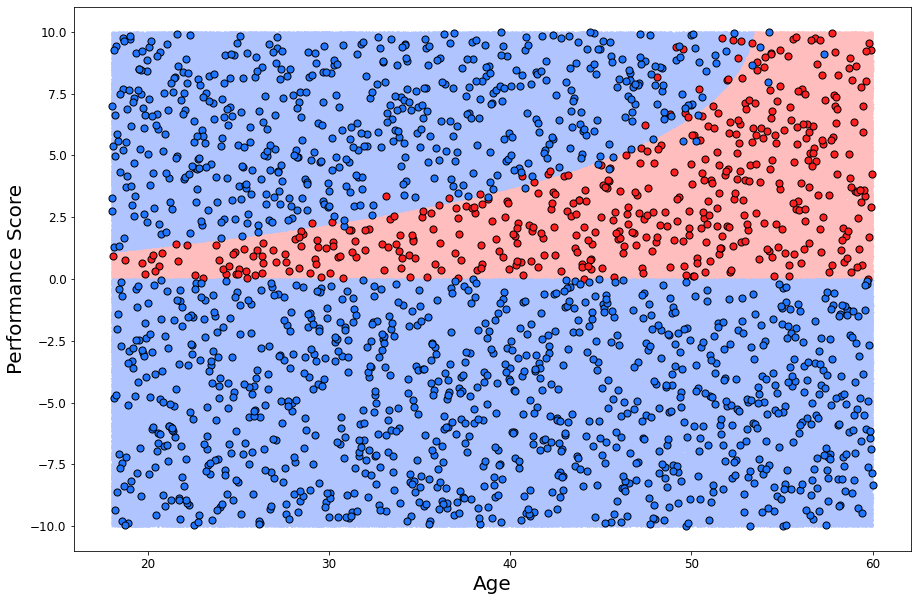

In [70]:
#Update decision boundry points
data_db.drop('y',axis=1,inplace=True)
data_db['age_perf_ratio'] = data_db['age']/data_db['performance']
sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('../figures/article_feature_eng/figureFinal.png',format='png')


## DNN Classifier


In [79]:
from keras.models import Sequential
from keras.layers import Dense

x = data[['age','performance']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=10) #fit ANN

accuracy = model.evaluate(x_test, y_test)
print(round(accuracy[1]*100,2))

Epoch 1/100
1400/1400 [==============================] - 0s 193us/step - loss: 1.3225 - accuracy: 0.6521
Epoch 2/100
1400/1400 [==============================] - 0s 100us/step - loss: 0.4680 - accuracy: 0.7721
Epoch 3/100
1400/1400 [==============================] - 0s 97us/step - loss: 0.3699 - accuracy: 0.8493
Epoch 4/100
1400/1400 [==============================] - 0s 103us/step - loss: 0.3027 - accuracy: 0.9000
Epoch 5/100
1400/1400 [==============================] - 0s 98us/step - loss: 0.2637 - accuracy: 0.9071
Epoch 6/100
1400/1400 [==============================] - 0s 105us/step - loss: 0.2402 - accuracy: 0.9136
Epoch 7/100
1400/1400 [==============================] - 0s 100us/step - loss: 0.2165 - accuracy: 0.9271
Epoch 8/100
1400/1400 [==============================] - 0s 99us/step - loss: 0.2079 - accuracy: 0.9179
Epoch 9/100
1400/1400 [==============================] - 0s 99us/step - loss: 0.1933 - accuracy: 0.9293
Epoch 10/100
1400/1400 [==============================] - 0

1400/1400 [==============================] - 0s 112us/step - loss: 0.0902 - accuracy: 0.9600
Epoch 79/100
1400/1400 [==============================] - 0s 101us/step - loss: 0.0892 - accuracy: 0.9607
Epoch 80/100
1400/1400 [==============================] - 0s 104us/step - loss: 0.0921 - accuracy: 0.9586
Epoch 81/100
1400/1400 [==============================] - 0s 105us/step - loss: 0.0815 - accuracy: 0.9643
Epoch 82/100
1400/1400 [==============================] - 0s 120us/step - loss: 0.0873 - accuracy: 0.9650
Epoch 83/100
1400/1400 [==============================] - 0s 106us/step - loss: 0.0903 - accuracy: 0.9593
Epoch 84/100
1400/1400 [==============================] - 0s 105us/step - loss: 0.0824 - accuracy: 0.9686
Epoch 85/100
1400/1400 [==============================] - 0s 103us/step - loss: 0.0845 - accuracy: 0.9657
Epoch 86/100
1400/1400 [==============================] - 0s 104us/step - loss: 0.0819 - accuracy: 0.9650
Epoch 87/100
1400/1400 [==============================] - 0

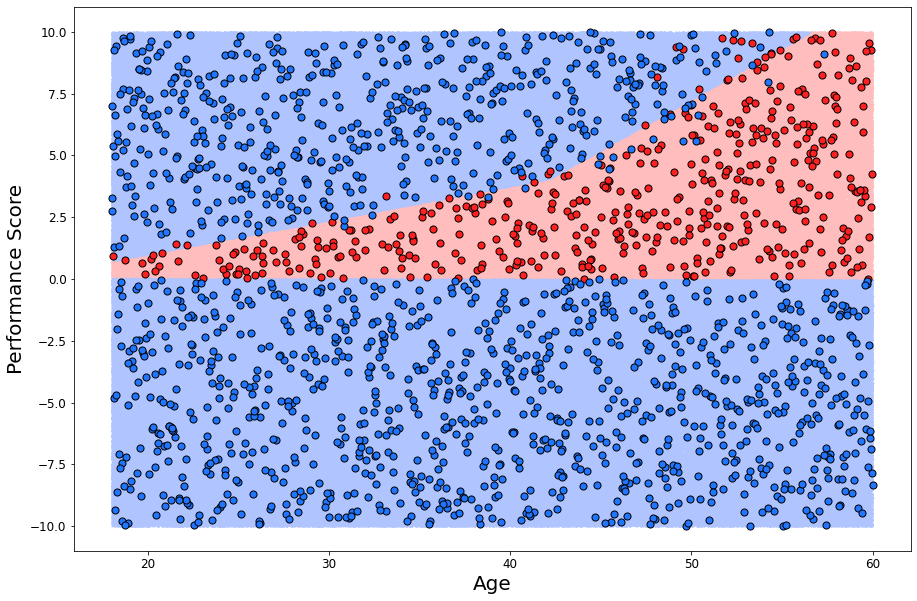

In [80]:
#make predictions on the decision boundry points
predictions = model.predict(data_db[['age','performance']])
y_db = np.around(predictions)
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('../figures/article_feature_eng/figure_ann.png',format='png')